In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Kernel :
Using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

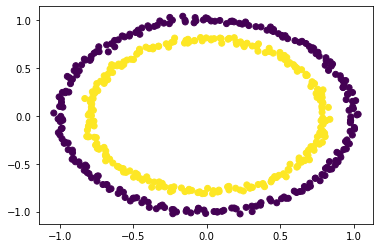

In [22]:
X, y = make_circles(n_samples=500, noise = 0.02)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [23]:
X.shape

(500, 2)

In [24]:
# It converts 2d data to 3d data so that it can be separated by a hyperplane hence can be classified using Logistic Regression
def dim(X):
    X1 = X[:,0]
    X2 = X[:,1]
    # 3rd dimension can be calculated using different algorithms called kernels depending upon the type of data(eg- text, circles, image, etc.)
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [25]:
X_ = dim(X)

In [26]:
X_.shape

(500, 3)

In [27]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

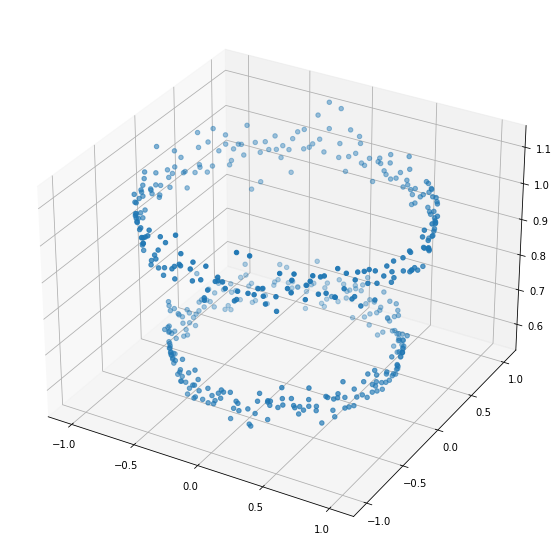

In [28]:
ax = plot3d(X_)

In [29]:
model = LogisticRegression()

In [30]:
# Converting the data from 2d to 3d had increased the accuracy of the Logistic Regression model
model.fit(X_, y)
accuracy = model.score(X_, y)*100

In [31]:
accuracy

100.0

In [32]:
wts = model.coef_
bias = model.intercept_

In [33]:
x, y = np.meshgrid(range(-2,2), range(-2,2))

In [34]:
# z is calculated by using equation of plane : ax1+bx2+cx3+d = 0
z = -(wts[0,0]*x + wts[0,1]*y+bias)/wts[0,2]

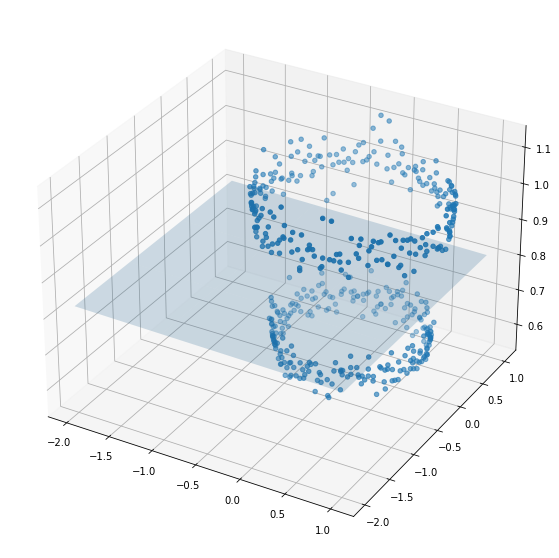

In [35]:
ax = plot3d(X_,False)
# Visualising the hyperplane
ax.plot_surface(x,y,z,alpha=0.2)
plt.show()

# Custom Implementation :

In [36]:
from sklearn.datasets import make_classification

In [37]:
X, y = make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

In [38]:
# In the data y have value 0 or 1 but in svm we need y as -1 or 1 so convert all y=0 to y=-1
y[y==0] = -1

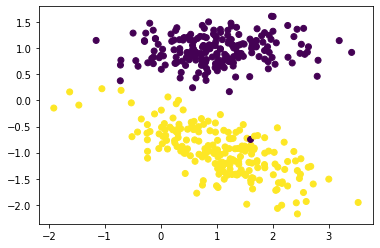

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [42]:
class SVM :
    def __init__(self, C = 1.0):
        self.C = C # penalty
        self.W = 0 # weights
        self.b = 0 # bias
        
    def hingeloss(self, W, b, X, y):
        loss = 0.0
        
        # Formula for calculating loss : 0.5*(weights.weights_transpose) + (penalty * max_error) for all elements
        loss += 0.5 * np.dot(W, W.T)
        
        for i in range(X.shape[0]):
            ti = y[i] * (np.dot(W, X[i].T) + b)
            # error can be in the range(0, 1-ti)
            loss += self.C * max(0, 1-ti)
            
        # Since we have taken dot product of matrices for calculating first term of loss so, loss will also be a matrix of the form [[loss]]
        return loss[0][0] # returns scalar answer from the matrix
    
    def fit(self, X, y, batch_size=100, lr=0.01, maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        n = lr
        c = self.C
        
        W = np.zeros((1, no_of_features))
        bias = 0
        
        losses = []
        
        # In each iteration, aim is to reduce losses
        for i in range(maxItr):
            l = self.hingeloss(W, bias, X, y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Take data in batches of size specified, shuffle them and find gradient descent
            for batch_start in range(0, no_of_samples, batch_size):
                # assume gradient is 0 for the batch at first
                gradw = 0
                gradb = 0
                
                for j in range(batch_start, batch_start + batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti >=1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * y[i] * X[i]
                            gradb += c * y[i]
                W = W - n * W + n * gradw
                bias = bias + n * gradb
        self.W = W
        self.b = bias
        return W, bias, losses

In [43]:
model = SVM(C=10)
W, b, losses = model.fit(X, y, maxItr=100)

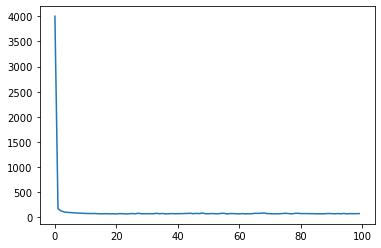

In [44]:
plt.plot(losses)

In [45]:
def plot_hyperplane(w1, w2, b):
    plt.figure(figsize=(12, 12))
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1 * x1 + b)/w2
    xp = -(w1 * x1 + b + 1)/w2
    xn = -(w1 * x1 + b - 1)/w2
    
    plt.plot(x1, x2, label="WX+B=0")
    plt.plot(x1, xp, label="WX+B=1")
    plt.plot(x1, xn, label="WX+B=-1")
    plt.legend()
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

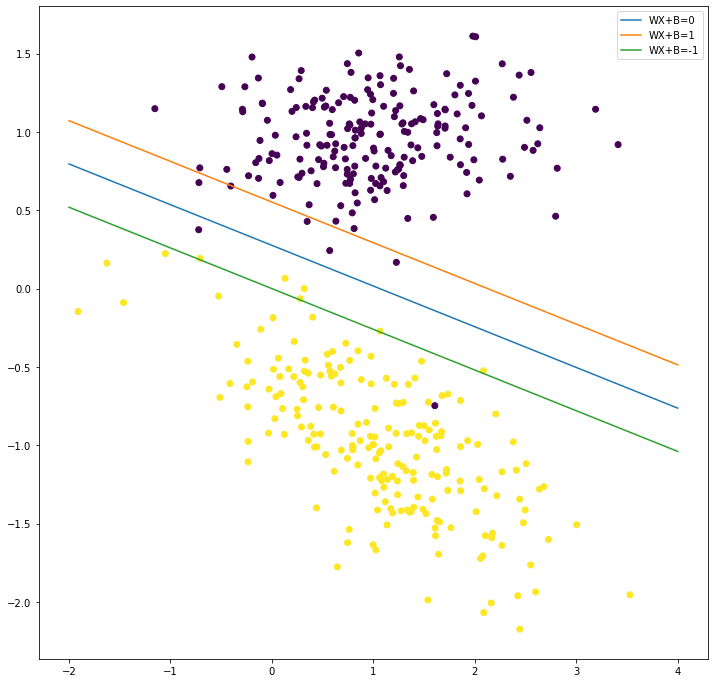

In [46]:
plot_hyperplane(W[0,0], W[0, 1], b)